# **Colab ব্যবহারকারীদের জন্য নোট**

# **সরাসরি এই ফাইলে লিখবেন না—আপনার কাজ হারিয়ে যেতে পারে!**

# **শুরু করার আগে সবসময় একটা কপি করে নিন।**

কপি তৈরির উপায়

1. উপরে বাম দিক থেকে "File" ক্লিক করুন।  
> *যদি “File” বা "Runtime" মত হেডার না দেখতে পান, উপরে ডান দিকে থাকা “v” চিহ্নে ক্লিক করুন, যাতে এগুলো দেখা যাবে।*

2. "Save a copy in Drive" নির্বাচন করুন।  

3. কপি করা ফাইলের নাম “YOURNAMEs\_FileName.ipynb” হিসেবে পরিবর্তন করুন।  
> উদাহরণ: আপনার নাম যদি Olivia হয়, তাহলে নাম হবে Olivias_FileName.ipynb

4. আপনার runtime **CPU** সেট করুন। T4 GPU তুলনায় বেশি সময়ে session রিসেট করে।<br>  
তাই, গড়ে CPU runtime ব্যবহার করাই ভালো, যদি GPU না লাগে ট্রেনিংয়ের জন্য।<br>  
এই [ভিডিওটি](https://youtu.be/XRmI-qRiFFw) দেখুন।<br>

> runtime মাঝপথে বদলালে শুরু থেকে সব সেল আবার চালাতে হবে।<br>  
> কাজ শুরু করার আগে runtime ঠিক করে নিন।<br>  
> *সেলগুলো আবার চালাতে: উপরে বাম থেকে “Runtime” → “Run before” ক্লিক করুন।*<br>

---

* চেক মার্ক (✅) সংরক্ষণ হয় না। Chrome এর refresh বাটন ক্লিক করলে সেগুলো চলে যায়।<br>  
বিরতি দিয়ে পরে আসার জন্য, শুধু একটা text cell যোগ করে “SO FAR DONE” টাইপ করে রাখুন।  

---

* Colab-এ **আগের আউটপুট ৩০ থেকে ৯০ মিনিটে রিসেট হয়ে যায়**।<br>  
  এজন্য `~~ is not defined` রকম ভুল বার বার আসতে পারে।  

  🔁 `~~ is not defined` এরর এলে করণীয়  
  1. প্রথমে নিশ্চিত করুন ভেরিয়েবলটির বানান ঠিক আছে।<br>  
  2. বানান ঠিক আছে কিন্তু এরর আসছে, তাহলে **যে সেলটি আবার চালাতে চান সেটাতে ক্লিক করুন**।<br>  
  3. “Runtime” (উপরে বাম)→ “Run before” ক্লিক করুন।<br>  
     → এতে **আগের সব সেল আবার চলবে**।  
  4. সেলটি আবার চালান।  

  এই সব করার পরেও এরর থাকলে,<br>  
  হয়তো আগের সেলগুলোর TODO উত্তরগুলোতে কোনো মৌলিক ভুল আছে।<br>  
  উত্তর ঠিক আছে কিনা ভালো করে দেখুন।<br>  
  অথবা ChatGPT বা অন্য কোনো কোডিং সহায়ক থেকে সাহায্য নিন।

# **Preparation**

এই অংশ শুধুমাত্র আগের Chapter থেকে কন্টেন্ট লোড করে।<br>
শুধু কোড চালান—এটা পড়ার দরকার নেই।<br>
আরাম করে সামনে চলে যান।<br>

In [ ]:
# ফাইল ডাউনলোড করুন
!wget https://raw.githubusercontent.com/HayatoHongo/Everyones_nanoGPT/main/input.txt -O input.txt
# আপনি যেই input.text ফাইলটি ডাউনলোড করেছেন সেটি utf-8 এ লোড করুন।
with open("input.txt", 'r', encoding = 'utf-8') as f:
    text = f.read()

# টেনসর সুন্দরভাবে প্রদর্শনের জন্য একটি ফাংশন (এটি বাদ দিতে পারেন)
import torch
import torch.nn as nn

def print_formatted_tensor(*args, width=6, decimals=2):
    """
    A function that neatly formats and displays a PyTorch Tensor, and also prints its size.

    Example usage:
        print_formatted_tensor("name", tensor)
        print_formatted_tensor(tensor)

    Args:
        *args: If given 1 argument, it is treated as a tensor.
               If given 2 arguments, the first is treated as the name, the second as the tensor.
        width (int): Display width for each number (default: 6)
        decimals (int): Number of decimal places to show (default: 2)
    """

    # Determine tensor and name from arguments
    if not args:
        raise ValueError("At least one argument is required.")
    if isinstance(args[0], str):
        if len(args) < 2:
            raise ValueError("Tensor is not specified.")
        name, tensor = args[0], args[1]
    else:
        name, tensor = None, args[0]

    # Convert Tensor to List
    tensor_list = tensor.detach().cpu().tolist()

    def format_list(lst, indent):
        """Formatting a recursively nested list and returning a string"""
        # If the contents are lists, then re-return
        if isinstance(lst, list) and lst and isinstance(lst[0], list):
            inner = ",\n".join(" " * indent + format_list(sub, indent + 2) for sub in lst)
            return "[\n" + inner + "\n" + " " * (indent - 2) + "]"
        # For numerical lists
        return "[" + ", ".join(f"{v:{width}.{decimals}f}" for v in lst) + "]"

    # Formatted string (bar brackets on outermost frames are removed)
    formatted = format_list(tensor_list, indent=9)
    inner_formatted = formatted[1:-1].strip()

    # Result output
    if name:
        print(name)
    print(f"Tensor Size: {list(tensor.size())}")
    print("tensor([")
    print(" " * 9 + inner_formatted)
    print(" " * 7 + "])")

class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        # শব্দভাণ্ডার x সংখ্যক এমবেডিং মাত্রার জন্য একটি এমবেডেড টেবিল সংজ্ঞায়িত করুন
        self.token_embedding_table = nn.Embedding(vocab_size, embedding_dim)

    def embed(self, input_indices):
        # ইনপুট ইনডেক্সের সাথে সংশ্লিষ্ট এমবেডেড ভেক্টর নিন
        return self.token_embedding_table.forward(input_indices)

# একটি পজিশন এমবেডেড মডিউল সংজ্ঞায়িত করা হচ্ছে
class PositionEmbedding(nn.Module):
    def __init__(self, input_sequence_length, embedding_dim):
        super().__init__()
        # অবস্থান এম্বেডিং স্তর
        self.position_embedding_layer = nn.Embedding(input_sequence_length, embedding_dim)

    def forward(self, input_indices):
        sequence_length = input_indices.shape[1]  # সিকোয়েন্সের দৈর্ঘ্য নিন
        position_indices = torch.arange(sequence_length, device=input_indices.device)  # অবস্থান সূচক তৈরি
        position_embeddings = self.position_embedding_layer(position_indices)  # অবস্থান এমবেডিং
        return position_embeddings

class EmbeddingModule(nn.Module):
    def __init__(self, vocab_size, config):
        super().__init__()
        # প্রতিটি টোকেনের জন্য এম্বেডেড লেয়ার
        self.token_embedding_layer = TokenEmbedding(vocab_size = vocab_size, embedding_dim = config.embedding_dim)
        self.position_embedding_layer = PositionEmbedding(input_sequence_length = config.input_sequence_length, embedding_dim = config.embedding_dim)

    def forward(self, input_indices):
        # টোকেন এমবেডিং নিন
        token_embeddings = self.token_embedding_layer.embed(input_indices)

        # অবস্থান এমবেডিং নিন
        position_embeddings = self.position_embedding_layer.forward(input_indices)

        # টোকেন এমবেডিং এবং পজিশন এমবেডিং যোগ করা হচ্ছে
        embeddings = token_embeddings + position_embeddings
        return embeddings

# Chapter 5: Layer Normalization

### Section 1: forward

আগের Chapter-এ আমরা ৮-অক্ষরের স্ট্রিং `Let's he` কে ৮ মাত্রায় এমবেড করার জন্য **Token Embedding + Position Embedding** স্মরণ করি।

In [ ]:
# কনফিগারেশন ক্লাস যা মডেলের সেটিংস সংরক্ষণ করে
class ModelConfig:
    batch_size = 1  # একবারে প্রক্রিয়াজাত করার ডেটার সংখ্যা (ব্যাচ সাইজ)
    input_sequence_length = 8  # ইনপুট ডেটার দৈর্ঘ্য (ক্রমের দৈর্ঘ্য)
    embedding_dim = 8  # এম্বেডেড লেয়ারের আকার (ফিচার ভেক্টরের মাত্রার সংখ্যা)

In [ ]:
import torch
import torch.nn as nn
torch.manual_seed(1337)

# একটি ModelConfig ইনস্ট্যান্স তৈরি করা হচ্ছে। কোনো কনফিগারেশন প্যারামিটার নেই (কনস্ট্রাক্টর)।
config = ModelConfig()

# EmbeddingModule এর একটি ইনস্ট্যান্স তৈরি করা হচ্ছে। কনফিগারেশন প্যারামিটারগুলো হলো শব্দভাণ্ডারের সংখ্যা এবং কনফিগ ইনস্ট্যান্স।
embedding_module = EmbeddingModule(vocab_size = 65, config = config)

# Let's he এর সাথে সামঞ্জস্যপূর্ণ। (ব্যাচ সাইজ, টোকেন দৈর্ঘ্য) = (1, 8)
sample_input_tokens = torch.tensor([[24, 43, 58, 5, 57, 1, 46, 43]])
embeddings = # TODO: Instance.Method(Argument)। ইঙ্গিতের জন্য আগের বা পূর্ববর্তী অধ্যায় দেখুন।
print_formatted_tensor(embeddings)

**PostNorm এবং PreNorm**  
<br>  

**Token Embedding + Position Embedding** থেকে প্রাপ্ত এমবেডিং গুলো Attention প্রয়োগের আগে normalize করা হয়।  

প্রথম Transformer পেপারে, Attention প্রয়োগের **পর** normalize করা হত। এটাকেই বলা হয় **PostNorm**।  

কিন্তু ইনপুট ডেটাকে স্থিতিশীল রাখতে, Attention-এর **আগে** ইনপুট normalize করা বেশি প্রচলিত হয়ে উঠে।  

এটিকেই বলা হয় **PreNorm**।  

এই এক্সপেরিমেন্টেও PreNorm ব্যবহার করা হয়েছে।  
<br>


**Token Embedding + Position Embedding এর জন্য Layer Normalization**<br>

Layer norm প্রতিটি token-এ embedding মাত্রার ওপর কাজ করে।  
এটি প্রতিটি token-এর embedding মাত্রার গড় ও বৈচিত্র্য (variance) হিসাব করে।  
তারপর tensor-কে সরিয়ে mean 0 এবং variance 1 করে তোলে।  

ইনপুট টেনসর এর আকৃতি হলো

(batch size, token length, embedding size)

Normalization embedding size মাত্রার ওপর হয়, অর্থাৎ `dim=-1` (সবশেষ মাত্রা)।

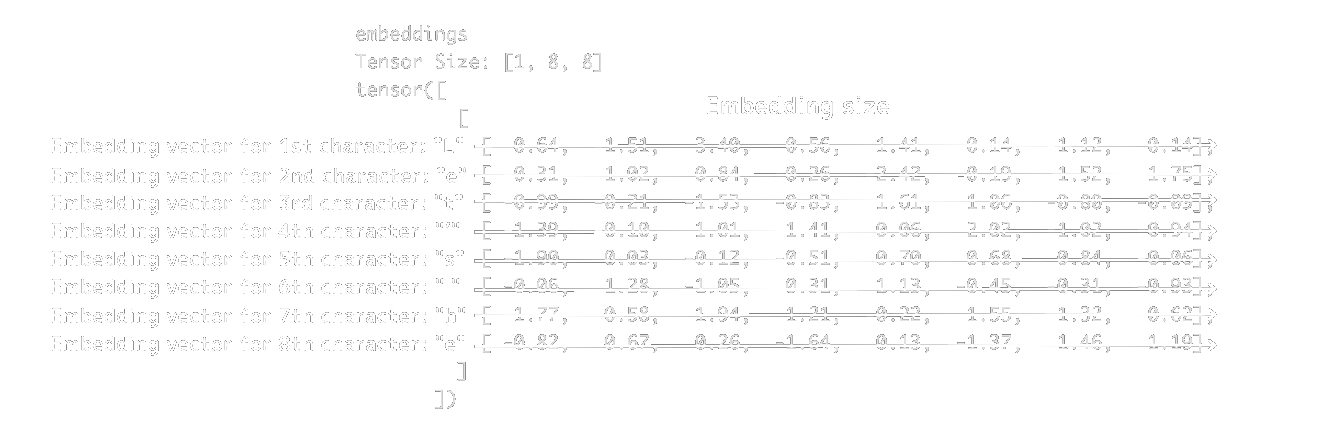

```python
Function: torch.mean
Arguments:
  - embeddings: ইনপুট টেনসর   আকার: (ব্যাচ সাইজ, টোকেন দৈর্ঘ্য, এম্বেডিং সাইজ) = (1, 8, 8)
  - dim=-1: -1 নম্বর ডাইমেনশনে (এম্বেডিং সাইজ) গড় হিসাব করবে। 2 ব্যবহার করলেও চলে।
  - keepdim=True: আউটপুট ডাইমেনশন রাখবে (আকার ভাঙা ঠেকাতে)
```
- **টেনসর `embeddings` এর শেষ ডাইমেনশন -1 (এম্বেডিং সাইজ) বরাবর গড় বের করে নতুন একটি টেনসর রিটার্ন করবে।**  
- `keepdim=True` দিলে আউটপুটের আকার `(1, 8, 1)` থাকে, মূল আকারের তথ্য রক্ষা হয়। <br>
  আর যদি `keepdim=False` হয়, আউটপুট আকার `(1, 8)` হবে, যা পরের ধাপে জটিলতা তৈরি করে।

In [ ]:
mean = # TODO: ফাংশন (আর্গুমেন্ট)
print_formatted_tensor("মু টেনসর", mean)

```python
Function: torch.var
Arguments:
  - embeddings: ইনপুট টেনসর যার আকৃতি (batch size, token length, embedding size) = (1, 8, 8)
  - dim=-1: শেষ ডাইমেনশন -1 (embedding size) বরাবর ভ্যারিয়েন্স হিসাব করুন
  - keepdim=True: আউটপুট ডাইমেনশন রাখুন (আকৃতি ধরে রাখতে)
  - unbiased=False: N দিয়ে ভাগ করে (ডিফল্ট `True` হলে ভাগ করে N-1 দিয়ে)।
```
- টেনসর `embeddings` এর **শেষ ডাইমেনশন -1 (embedding size) বরাবর ভ্যারিয়েন্স হিসাব করে নতুন টেনসর দেয়**।
- `keepdim=True` দেওয়া হলে আউটপুট ভ্যারিয়েন্স টেনসরের আকার হয় `(1, 8, 1)`, ফলে মূল আকৃতি বজায় থাকে। <br>
যদি `keepdim=False` দেন, তাহলে ভ্যারিয়েন্স টেনসরের আকার হয়ে যায় `(1, 8)`, যা পরের গণনায় ঝামেলা তৈরি করে।
- `unbiased = False` দিলে N দিয়ে ভাগ হয়। `unbiased = True` দিলে N-1 দিয়ে ভাগ হয়।


In [ ]:
var = # TODO: ফাংশন (আর্গুমেন্ট)
print_formatted_tensor("পার্থক্য টেনসর", var)

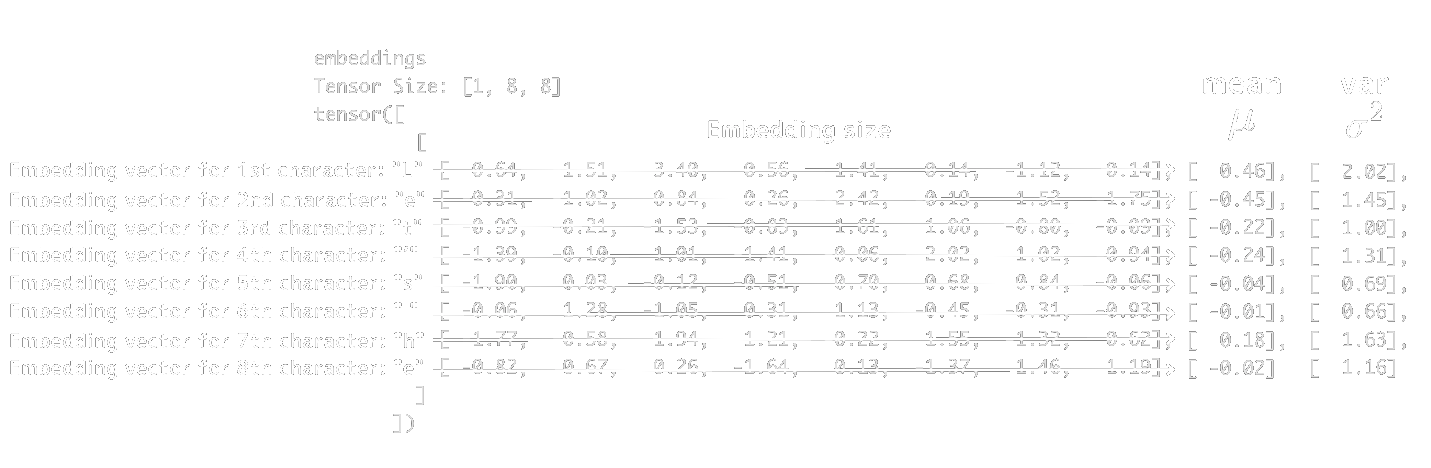

**Standard Normalization**

পুরো প্রক্রিয়াটা এমন লেখা হয়:

$$
\text{Normalized value} = \frac{x_i - \mu}{\sqrt{(\sigma^2 + \epsilon)}}
$$

মূলের ভিতরে আছে \$(\sigma^2 + \epsilon)\$।

1. গড় বিয়োগ করুন (Centering: \$x_i - \mu\$)

   * ডেটাগুলো সরান যাতে গড় মান 0 হয়।

2. স্ট্যান্ডার্ড ডিভিয়েশন দিয়ে ভাগ করুন (Scaling: \$\sqrt{(\sigma^2 + \epsilon)}\$)

   * ভ্যারিয়েন্সের বর্গমূল নিন এবং সাথে একটা ছোট মান যোগ করুন।
   * ছোট মান \$\epsilon\$ দিয়ে শূন্য দ্বারা ভাগ হওয়া আটকান।
   * সাধারণত \$\epsilon = 10~^{-5}\$ ধরা হয়।

PyTorch ফ্লেক্সিবল broadcasting সাপোর্ট করে,<br>
তাই `eps`-এর মতো ভেরিয়েবলে `.unsqueeze()` ব্যবহার করার দরকার নেই আকার মিলানোর জন্য।<br>
একটু রিমাইন্ডার, কারণ আগের Chapter-গুলোতে আলোচ্য হয়েছে—<br>
broadcasting এমন একটা ক্ষমতা যা ভিন্ন মাপের টেনসর নিয়ে সহজে কাজ করতে দেয়।

In [ ]:
eps = # TODO: 10 এর -n ঘাতকে 1e-n হিসেবে দেখানো যায়
hat = # TODO: স্ট্যান্ডার্ড নরমালাইজেশন ফর্মুলা প্রয়োগ করুন। টিপ: torch.sqrt ব্যবহার করুন। x হল ভেরিয়েবল `embeddings`।
print_formatted_tensor("টুপি", hat)

**`Check Point`** <label><input type="checkbox"> ← যদি উপরোক্ত ফলাফল নিচের উত্তরের সাথে মিলে থাকে, এই বাক্সে টিক দিন<label>

```
hat
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.13,  -1.39,   2.07,   0.07,   0.67,  -0.22,  -1.11,  -0.22],
           [  0.12,  -0.48,   1.07,   0.15,  -1.64,   0.22,   1.64,  -1.08],
           [ -0.77,   0.01,  -1.30,  -0.61,   1.83,   1.28,  -0.57,   0.13],
           [ -1.00,   0.12,   1.09,  -1.03,   0.15,   1.97,  -0.68,  -0.61],
           [ -2.24,   0.08,  -0.09,  -0.56,   0.89,   0.87,   1.06,  -0.02],
           [ -0.06,   1.59,  -1.28,   0.40,   1.40,  -0.54,  -0.37,  -1.13],
           [ -1.53,  -0.60,   1.38,   0.81,  -0.32,   1.08,  -1.18,   0.35],
           [ -0.74,   0.63,   0.26,  -1.50,   0.13,  -1.26,   1.37,   1.12]
         ]
       ])
```

প্রথম টোকেনটি সব embedding size বরাবর যোগ করুন, তারপর গড় বের করুন।

In [ ]:
sum_hat_token0 = 0.13 + (-1.39) + (2.07) + 0.07 + 0.67 + (-0.22) + (-1.11) + (-0.22)
print("sum_hat_dim0", round(sum_hat_token0, 2))

In [ ]:
mean_hat_dim0 = sum_hat_token0 / 8
print("মিন_হ্যাট_ডিম0", round(mean_hat_dim0, 2))

প্রতিটি এম্বেডিং মাত্রার জন্য normalized tensor `hat` এর গড় এবং variance হিসাব করুন।

```python
Function: torch.mean
Arguments: THINK_FOR_YOURSELF
```

In [ ]:
mean_hat = # TODO: নরমালাইজড টেনসর `hat` এর গড় নির্ণয় করুন।
print_formatted_tensor("গড়_hat", mean_hat)

```python
Function: torch.var
Arguments: THINK_FOR_YOURSELF
```

In [ ]:
var_hat = # TODO: `hat` নামের স্বাভাবিকীকৃত টেনসরের বৈচিত্র্য হিসাব করুন।
print_formatted_tensor("var_hat", var_hat)

**Scaling and Shifting**

স্ট্যান্ডার্ড নরমালাইজেশন মানে গড় 0 এবং ভ্যারিয়েন্স 1 করা।

কিন্তু ডেটা সবসময় স্ট্যান্ডার্ড নর্মাল ডিস্ট্রিবিউশনে ফিট হয় না... তাই না?

তাই, এটা গড় (β) এবং ভ্যারিয়েন্স ($\gamma^2$) সহ একটি নর্মাল ডিস্ট্রিবিউশন প্রকাশ করতে দেয়।

এটা scaling (γ) আর shifting (β) দিয়ে করা হয়। (এটাই VAE-এর মত আইডিয়া)<br>
<br>

$$
{norm\_embeddings} = \gamma \hat~{x} + \beta
$$

<br>
প্রথমে, scaling (γ) 1 আর shifting (β) 0 ধরা হয় যেন স্ট্যান্ডার্ড নরমালাইজেশনের মতো হয়। মানে শুরুতে এটা স্ট্যান্ডার্ড নর্মাল।<br>
তারপর, ট্রেনিং চলার সাথে সাথে γ আর β বদলায়।


In [ ]:
token_length = 8
gammma = # TODO: torch.ones(token_length)
beta = # TODO: torch.zeros(token_length)  # token_length সমান শূন্য মানের টেনসর তৈরি করুন

print_formatted_tensor("গামা", gammma)
print_formatted_tensor("বেটা", beta)

$$
{norm\_embeddings} = \gamma \hat~{x} + \beta
$$>norm_embeddings হল সাধারনীকৃত এমবেডিং, যেখানে $\gamma$ এবং $\beta$ হলো লার্নেবল প্যারামিটার, আর $\hat~{x}$ হলো ইনপুটের নর্মালাইজড ফিচার।

In [ ]:
norm_embeddings = # TODO: উপরের সূত্রটি বাস্তবায়ন করুন। Pytorch-এ ব্যাচ সাইজ থাকার বা না থাকার হিসাব প্রায়শই নমনীয়ভাবে করা হয়।
print_formatted_tensor("নর্ম এমবেডিংস", norm_embeddings)

শুরুর দিকে, scale ($\gamma$) কে 1 এবং shift ($\beta$) কে 0 সেট করা হয় যেন স্ট্যান্ডার্ড normalization এর সাথে মিলে যায়।

তাই, `hat` এবং `norm_embeddings` শুরুতে একটাই থাকে।<br>

**`Check Point`** <label><input type="checkbox"> ← উপরের ফলাফল নিচের উত্তরের সঙ্গে মিললে এই বাক্সে টিক দিন<label>

```
norm_embeddings
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.13,  -1.39,   2.07,   0.07,   0.67,  -0.22,  -1.11,  -0.22],
           [  0.12,  -0.48,   1.07,   0.15,  -1.64,   0.22,   1.64,  -1.08],
           [ -0.77,   0.01,  -1.30,  -0.61,   1.83,   1.28,  -0.57,   0.13],
           [ -1.00,   0.12,   1.09,  -1.03,   0.15,   1.97,  -0.68,  -0.61],
           [ -2.24,   0.08,  -0.09,  -0.56,   0.89,   0.87,   1.06,  -0.02],
           [ -0.06,   1.59,  -1.28,   0.40,   1.40,  -0.54,  -0.37,  -1.13],
           [ -1.53,  -0.60,   1.38,   0.81,  -0.32,   1.08,  -1.18,   0.35],
           [ -0.74,   0.63,   0.26,  -1.50,   0.13,  -1.26,   1.37,   1.12]
         ]
       ])
```

### Section 2: একটি Class ডিফাইন করা

🔘 **Options**: অতিরিক্ত কিছু অপশন থাকতে পারে যা আপনার দরকার নাও হতে পারে।

`np.ones`  `self.eps`  `self.norm_dim`  `mean`  `var`  `torch.sqrt`  `hat`

In [ ]:
class LayerNorm(nn.Module):  # এখানে nn.Module থেকে উত্তরাধিকার সূত্রে নেওয়া হয়েছে
    def __init__(self, token_length, eps=1e-5, norm_dim=-1):
        super().__init__()
        self.eps = eps
        self.norm_dim = norm_dim

        # গামা এবং বেটাকে nn.Parameter হিসেবে নিবন্ধন করুন যাতে CPU ও CUDA উভয়েই ব্যবহার করা যায়।
        self.gamma = nn.Parameter(torch.ones(token_length))
        self.beta = nn.Parameter(torch.zeros(token_length))

    def forward(self, x):
        mean = torch.mean(x, dim=self.norm_dim, keepdim=True)
        var = torch.var(x, dim=__________, keepdim=True, unbiased=False)
        normalized_x = (x - ____) / torch.sqrt(___ + self.eps)
        output =  self.gamma * ___ + self.beta
        return output

<details>
<summary>উত্তর দেখাতে/লুকাতে এখানে ক্লিক করুন</summary>

```python
class LayerNorm(nn.Module):  # nn.Module থেকে উত্তরাধিকার সূত্রে পাওয়া
    def __init__(self, token_length, eps=1e-5, norm_dim=-1):
        super().__init__()
        self.eps = eps
        self.norm_dim = norm_dim

        # gamma এবং beta কে nn.Parameter হিসেবে নিবন্ধন করা যা CPU ও CUDA উভয়ে ব্যবহারযোগ্য
        self.gamma = nn.Parameter(torch.ones(token_length))
        self.beta = nn.Parameter(torch.zeros(token_length))

    def forward(self, x):
        mean = torch.mean(x, dim=self.norm_dim, keepdim=True)
        var = torch.var(x, dim=self.norm_dim, keepdim=True, unbiased=False)
        hat = (x - mean) / torch.sqrt(var + self.eps)
        output =  self.gamma * hat + self.beta
        return output
```

In [ ]:
layer_norm = LayerNorm(token_length = config.input_sequence_length)
norm_embeddings = # TODO: Instance.Method(Argument)। Argument হলো `embeddings`
print_formatted_tensor("নর্ম এম্বেডিংস", norm_embeddings)

**`Check Point`** <label><input type="checkbox"> ← যদি উপরের ফলাফল নিচের উত্তরের সাথে মিলে যায়, তবে এই বক্সটি টিক করুন<label>

```
norm_embeddings
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.13,  -1.39,   2.07,   0.07,   0.67,  -0.22,  -1.11,  -0.22],
           [  0.12,  -0.48,   1.07,   0.15,  -1.64,   0.22,   1.64,  -1.08],
           [ -0.77,   0.01,  -1.30,  -0.61,   1.83,   1.28,  -0.57,   0.13],
           [ -1.00,   0.12,   1.09,  -1.03,   0.15,   1.97,  -0.68,  -0.61],
           [ -2.24,   0.08,  -0.09,  -0.56,   0.89,   0.87,   1.06,  -0.02],
           [ -0.06,   1.59,  -1.28,   0.40,   1.40,  -0.54,  -0.37,  -1.13],
           [ -1.53,  -0.60,   1.38,   0.81,  -0.32,   1.08,  -1.18,   0.35],
           [ -0.74,   0.63,   0.26,  -1.50,   0.13,  -1.26,   1.37,   1.12]
         ]
       ])
```

In [ ]:
layer_norm = nn.LayerNorm(config.embedding_dim)
norm_embeddings = # TODO: Instance.Method(Argument)। Argument হলো `embeddings`
print_formatted_tensor("নর্ম_এম্বেডিংস", norm_embeddings)

**`Check Point`** <label><input type="checkbox"> ← উপরের ফলাফল নিচের উত্তরের সাথে মিললে এই বাক্সে টিক দিন<label>

```
norm_embeddings
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.13,  -1.39,   2.07,   0.07,   0.67,  -0.22,  -1.11,  -0.22],
           [  0.12,  -0.48,   1.07,   0.15,  -1.64,   0.22,   1.64,  -1.08],
           [ -0.77,   0.01,  -1.30,  -0.61,   1.83,   1.28,  -0.57,   0.13],
           [ -1.00,   0.12,   1.09,  -1.03,   0.15,   1.97,  -0.68,  -0.61],
           [ -2.24,   0.08,  -0.09,  -0.56,   0.89,   0.87,   1.06,  -0.02],
           [ -0.06,   1.59,  -1.28,   0.40,   1.40,  -0.54,  -0.37,  -1.13],
           [ -1.53,  -0.60,   1.38,   0.81,  -0.32,   1.08,  -1.18,   0.35],
           [ -0.74,   0.63,   0.26,  -1.50,   0.13,  -1.26,   1.37,   1.12]
         ]
       ])
```

আহা, ভয় পাবেন না, Pytorch-এ `nn.LayerNorm` তো built in আছে।

built-in টা ব্যবহার করলে কাজ তাড়াতাড়ি হয় আর ভুলও কম হয়।

```python
instance: layer_norm = nn.LayerNorm(input_dim)
input_dim: config.embedding_dim # ইনপুট টোকেনের দৈর্ঘ্য নয়
```

* `nn.LayerNorm` হল **Layer Normalization** এর জন্য একটি মডিউল।
* `config.embedding_dim` দিয়ে normalized ডাইমেনশান বা embedding সাইজ সেট করা হয়।<br>
  লক্ষ্য করবেন, `nn.LayerNorm` নিজের ভেতরই টোকেনের দৈর্ঘ্য বুঝে ফেলে, তাই আলাদাভাবে দিতে হয় না।

In [ ]:
# একটি লেয়ার নরমালাইজেশন ইন্সট্যান্স তৈরি করুন
layer_norm = # TODO: nn.LayerNorm(input_dim) নির্ধারণ করুন
norm_embeddings = layer_norm.forward(embeddings)
print_formatted_tensor("নর্ম_এম্বেডিংস", norm_embeddings)

**`Check Point`** <label><input type="checkbox"> ← উপরের ফলাফল নিচের উত্তরের সঙ্গে মিললে এই বাক্সটি চেক করুন<label>

```
norm_embeddings
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.13,  -1.39,   2.07,   0.07,   0.67,  -0.22,  -1.11,  -0.22],
           [  0.12,  -0.48,   1.07,   0.15,  -1.64,   0.22,   1.64,  -1.08],
           [ -0.77,   0.01,  -1.30,  -0.61,   1.83,   1.28,  -0.57,   0.13],
           [ -1.00,   0.12,   1.09,  -1.03,   0.15,   1.97,  -0.68,  -0.61],
           [ -2.24,   0.08,  -0.09,  -0.56,   0.89,   0.87,   1.06,  -0.02],
           [ -0.06,   1.59,  -1.28,   0.40,   1.40,  -0.54,  -0.37,  -1.13],
           [ -1.53,  -0.60,   1.38,   0.81,  -0.32,   1.08,  -1.18,   0.35],
           [ -0.74,   0.63,   0.26,  -1.50,   0.13,  -1.26,   1.37,   1.12]
         ]
       ])
```

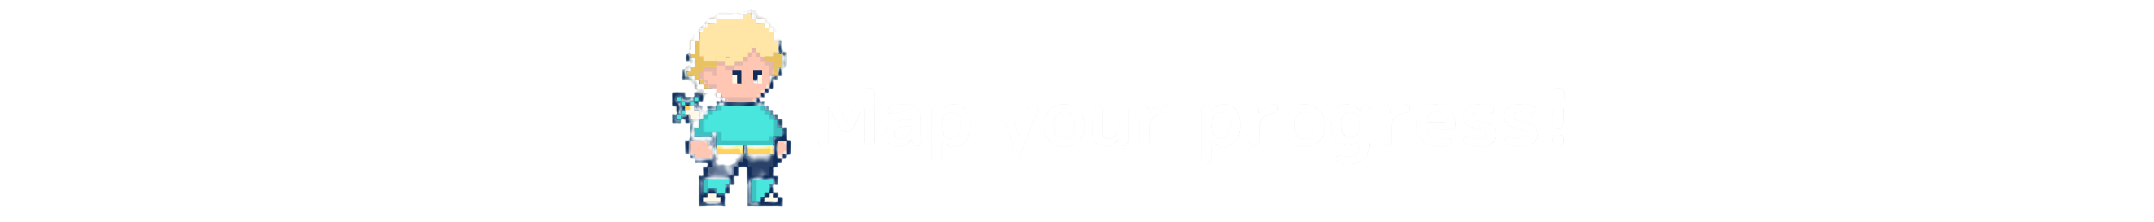

**Chapter 5: Layer Normalization** <label><input type="checkbox"> Mark as Done</label>